<a href="https://colab.research.google.com/github/Ren2be/Ren2be/blob/main/German_credit_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv')

Mounted at /content/drive


In [ ]:
# One-hot encode 'Saving accounts' and 'Checking account' columns
df = pd.get_dummies(df, columns=['Saving accounts', 'Checking account'], prefix=['Saving accounts', 'Checking account'], dummy_na=False, dtype=int)

# Save the updated DataFrame to the original CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv', index=False)

print("One-hot encoding complete and data saved to 'german_credit_data.csv'")

# Both of these columns have missing values and the best solution to handle this
# issue is to one-hot encode the values. Another solution was to fill in the
# missing values, but this wouldn't accurate.

One-hot encoding complete and data saved to 'german_credit_data.csv'


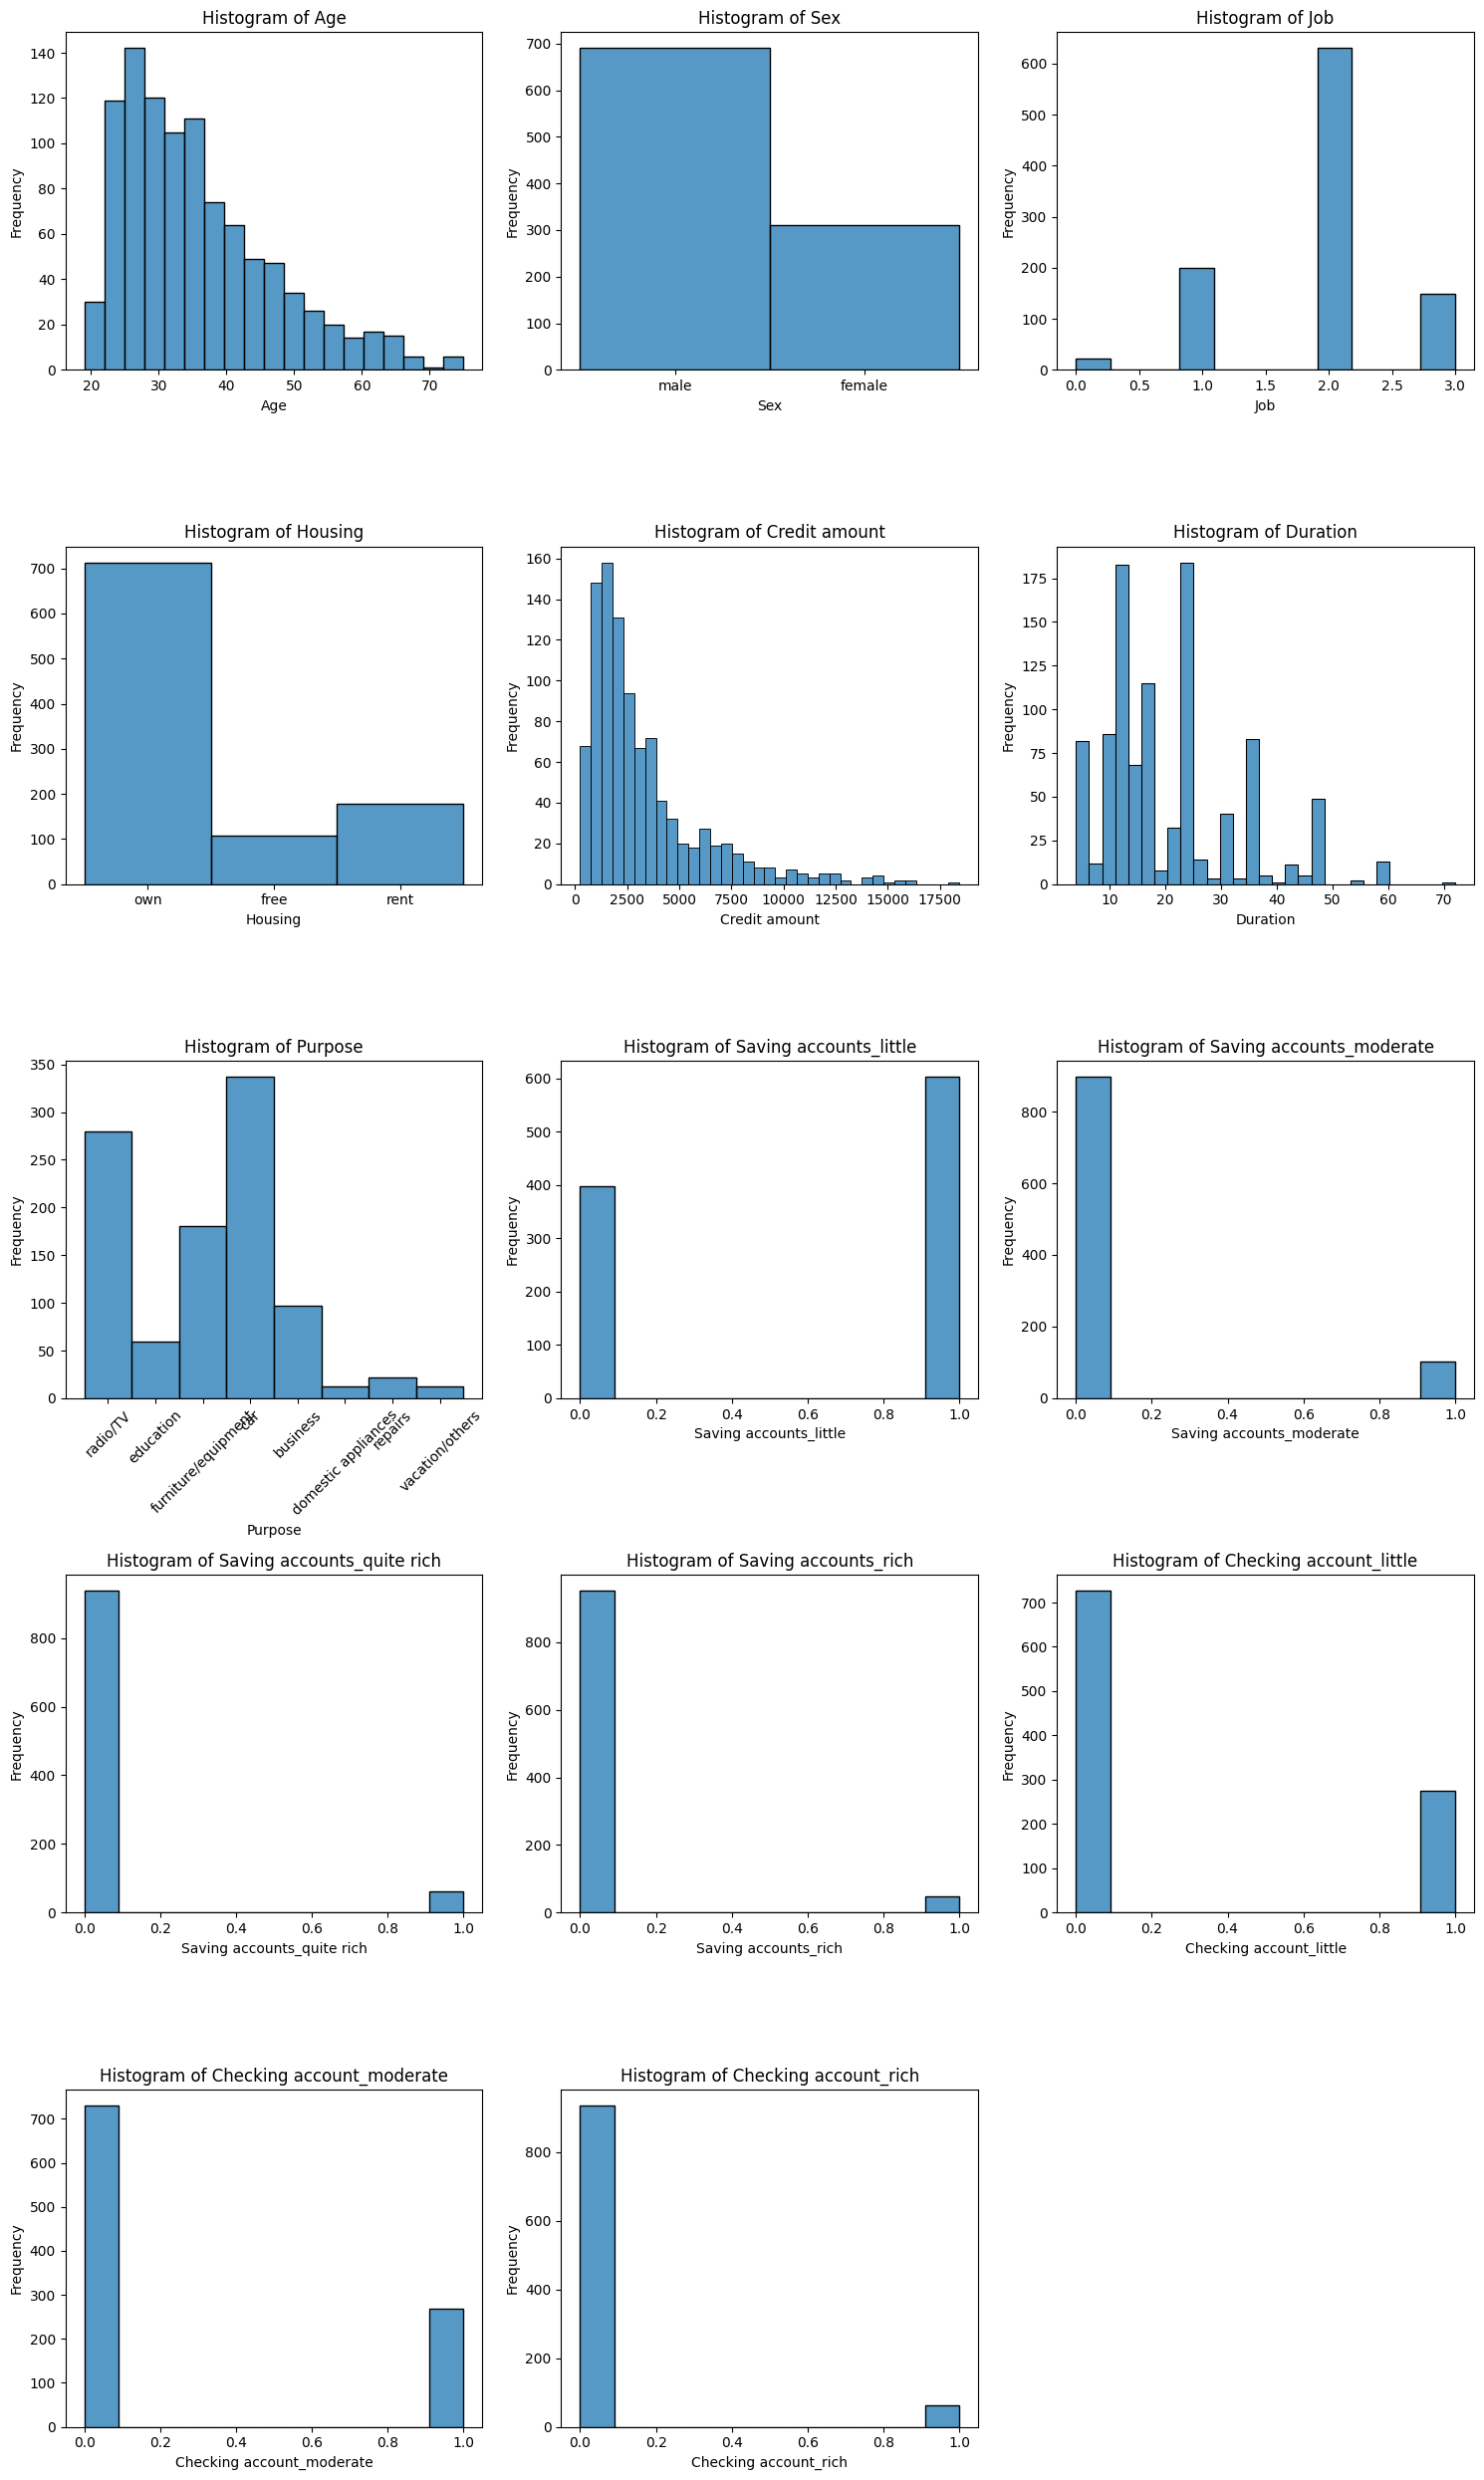

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get the list of columns to plot
columns = df.columns

# Determine the number of rows needed
n_cols = 3
n_rows = math.ceil(len(columns) / n_cols)

# Create the subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot histograms for each column
for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    # Rotate x-axis labels for 'Purpose' column
    if col == 'Purpose':
        axes[i].tick_params(axis='x', rotation=45)


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The three numerical columns are right skewed.

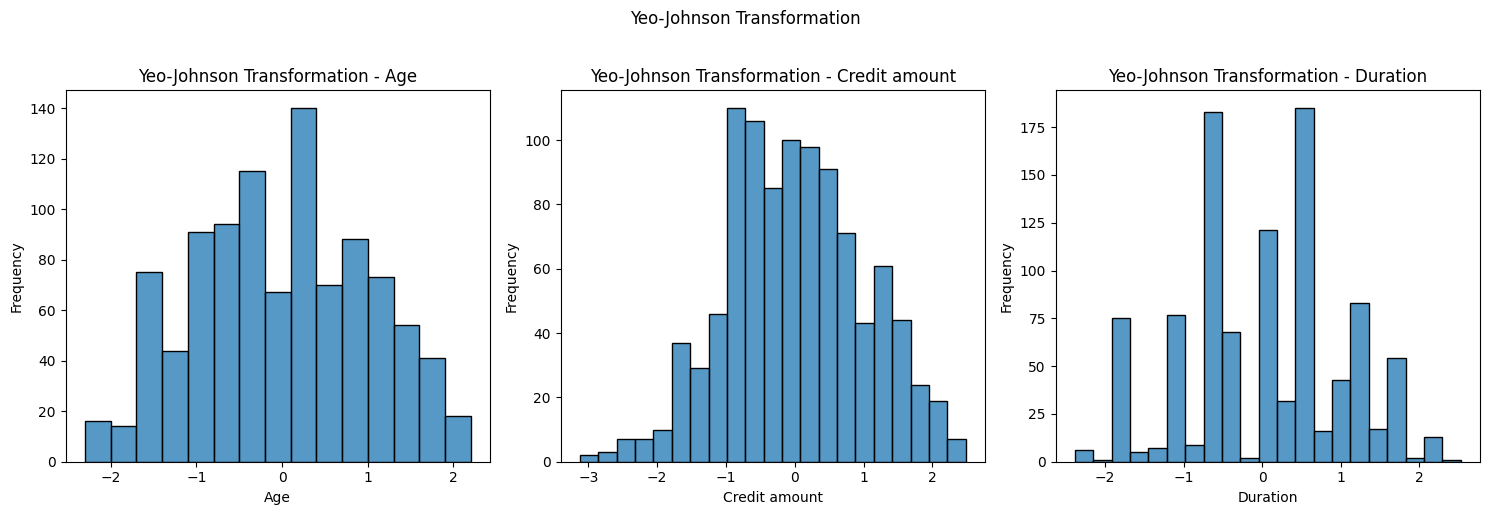

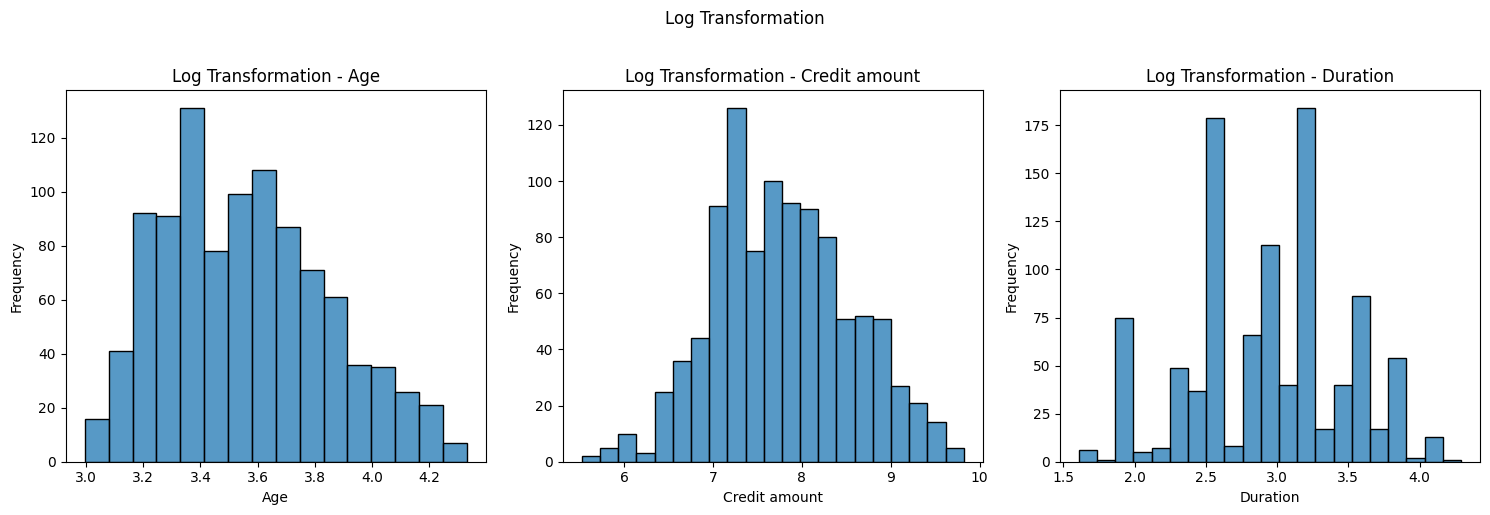

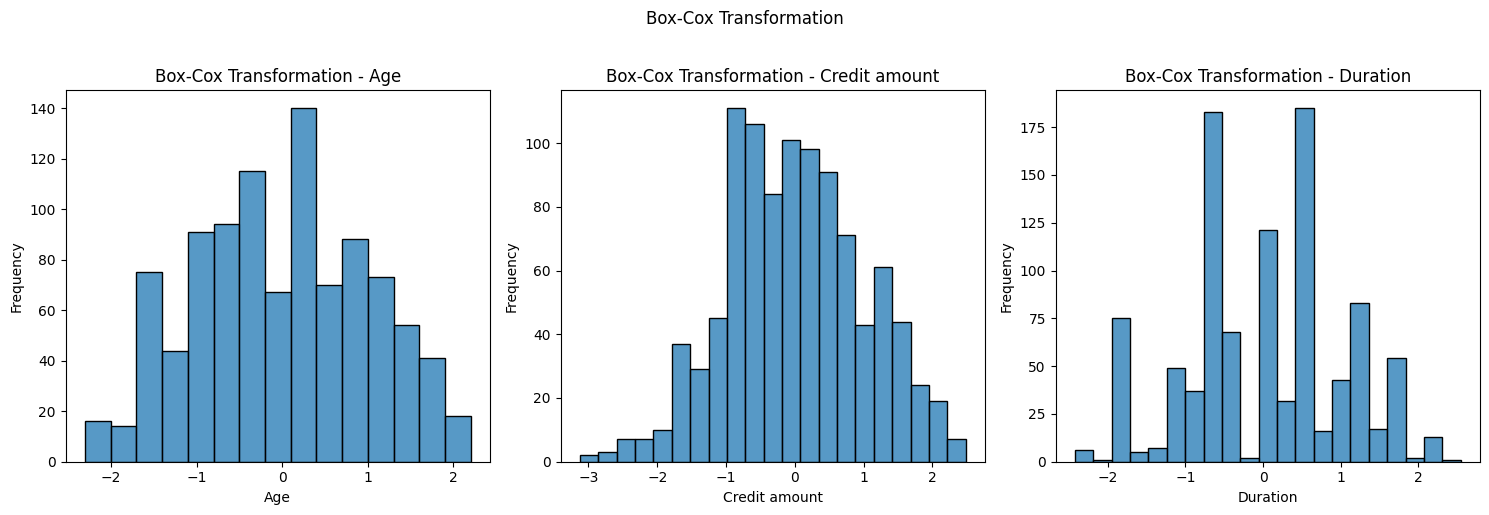

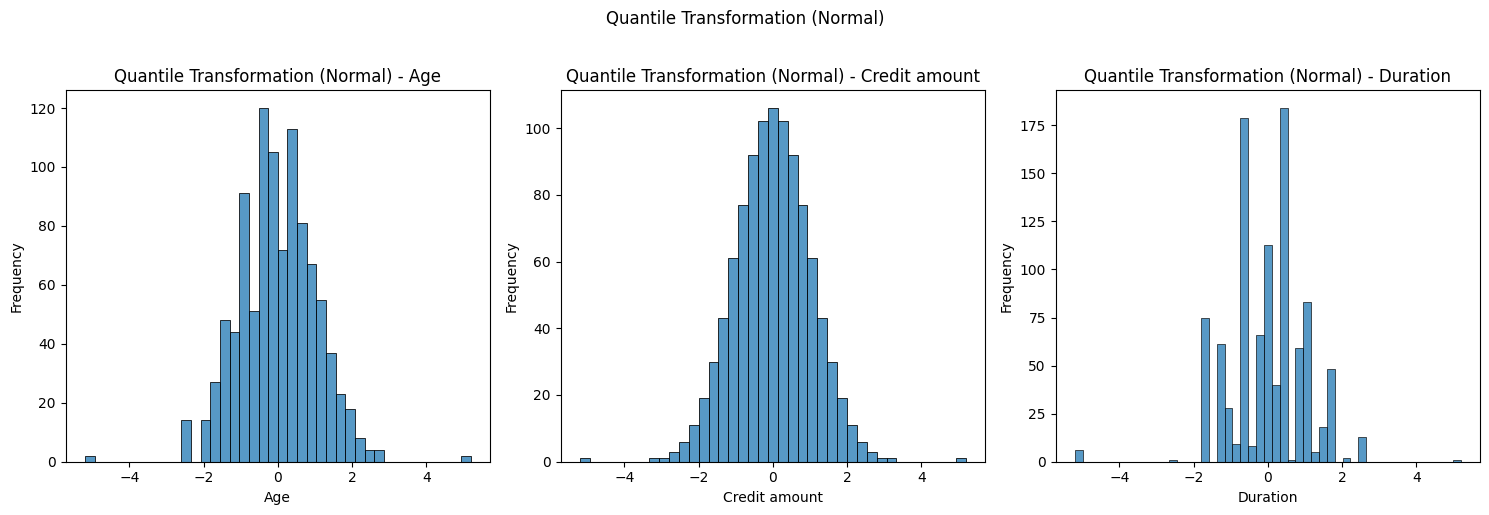

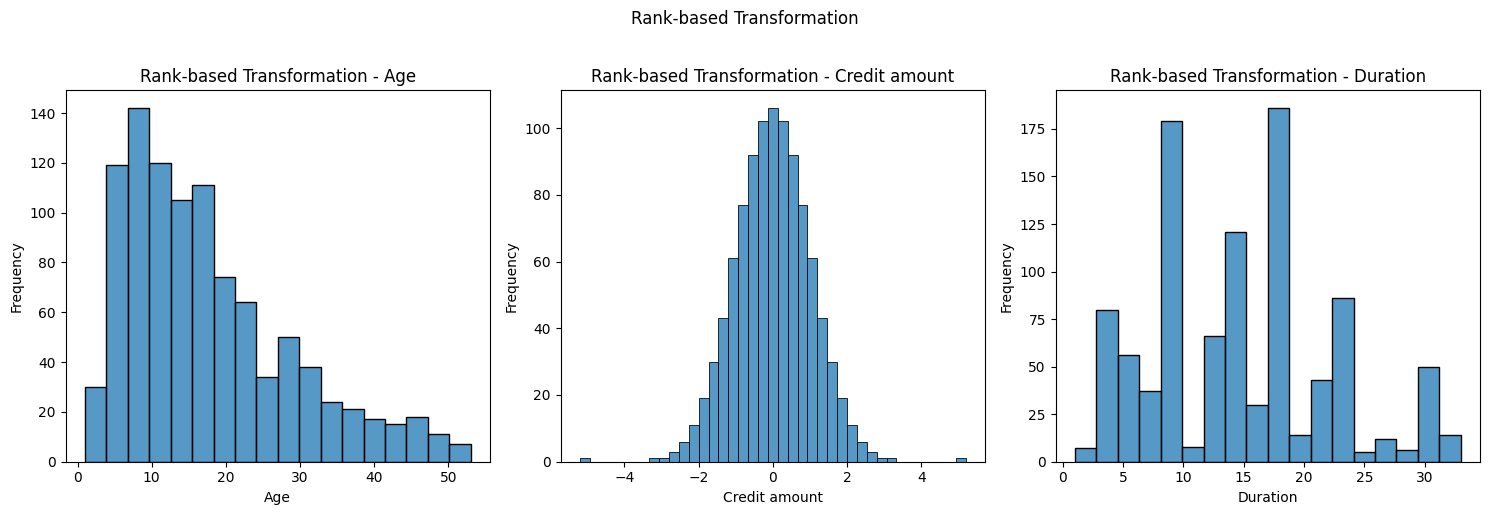

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import power_transform, QuantileTransformer

# Select columns for transformation
cols_to_transform = ['Age', 'Credit amount', 'Duration']

# Apply Yeo-Johnson transformation
yeojohnson_transformed_df = df.copy()
yeojohnson_transformed_df[cols_to_transform] = power_transform(df[cols_to_transform], method='yeo-johnson')

# Apply Log transformation (handle potential zeros/negatives by adding a small value if needed)
log_transformed_df = df.copy()
log_transformed_df[cols_to_transform] = np.log1p(df[cols_to_transform]) # Use log1p for robustness

# Apply Box-Cox transformation (requires positive data, handle if necessary)
# Check if data is positive for Box-Cox
if (df[cols_to_transform] > 0).all().all():
    boxcox_transformed_df = df.copy()
    boxcox_transformed_df[cols_to_transform] = power_transform(df[cols_to_transform], method='box-cox')
else:
    print("Box-Cox transformation skipped: Data contains non-positive values.")
    boxcox_transformed_df = None

# Apply Quantile transformation (output distribution 'normal')
quantile_transformed_df = df.copy()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000) # Use a reasonable number of quantiles
quantile_transformed_df[cols_to_transform] = qt.fit_transform(df[cols_to_transform])

# Apply Rank-based INF transformation
rank_transformed_df = df.copy()
for col in cols_to_transform:
    if col == 'Credit amount':
        # Apply rank transformation and then quantile transformation for normal distribution
        rank_transformed_df[col] = df[col].rank(method='dense')
        qt_rank = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
        rank_transformed_df[col] = qt_rank.fit_transform(rank_transformed_df[[col]])[:,0]
    else:
        rank_transformed_df[col] = df[col].rank(method='dense')


# Function to plot histograms for transformed data
def plot_transformed_histograms(dataframe, title_prefix):
    if dataframe is not None:
        fig, axes = plt.subplots(1, len(cols_to_transform), figsize=(15, 5))
        fig.suptitle(title_prefix, y=1.02)
        for i, col in enumerate(cols_to_transform):
            sns.histplot(data=dataframe, x=col, ax=axes[i])
            axes[i].set_title(f'{title_prefix} - {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot histograms for each transformation
plot_transformed_histograms(yeojohnson_transformed_df, 'Yeo-Johnson Transformation')
plot_transformed_histograms(log_transformed_df, 'Log Transformation')
plot_transformed_histograms(boxcox_transformed_df, 'Box-Cox Transformation')
plot_transformed_histograms(quantile_transformed_df, 'Quantile Transformation (Normal)')
plot_transformed_histograms(rank_transformed_df, 'Rank-based Transformation')

Figuring out which transformation performed the best for each specific column ('Age', 'Credit amount', 'Duration')


In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv')

Mounted at /content/drive


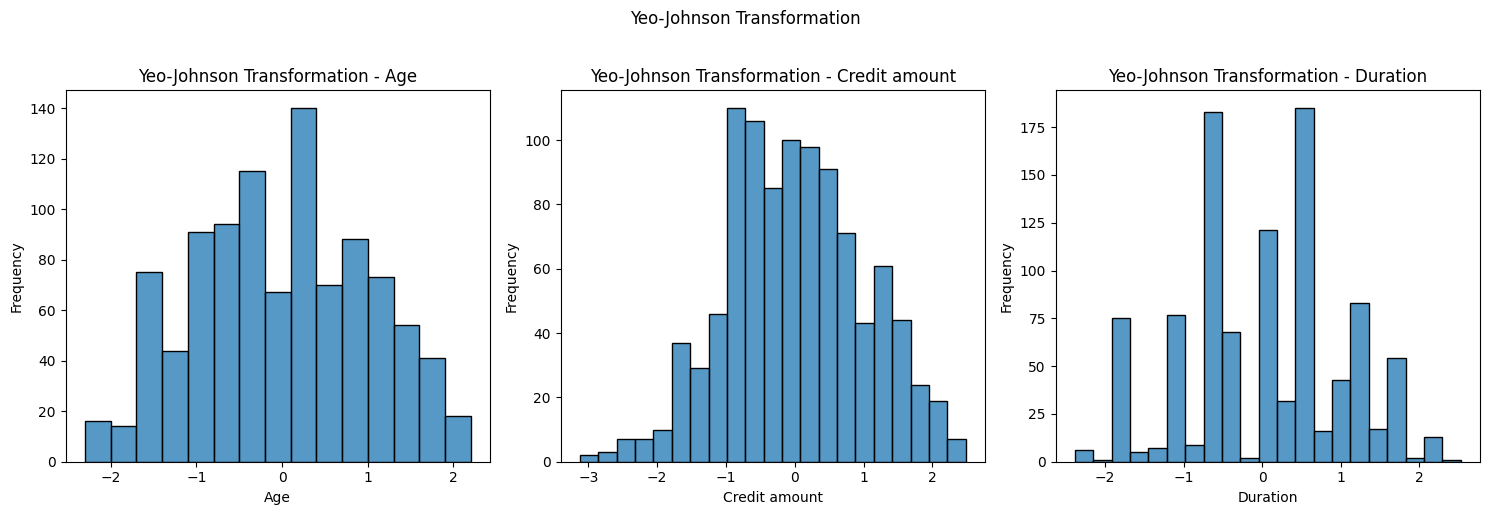

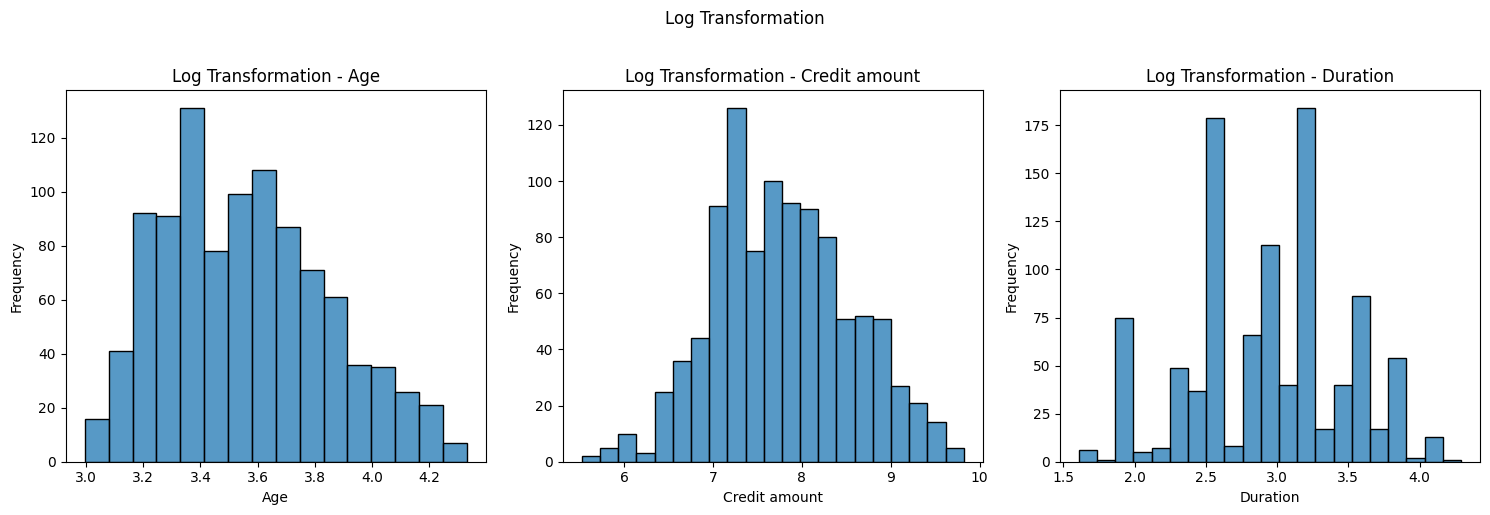

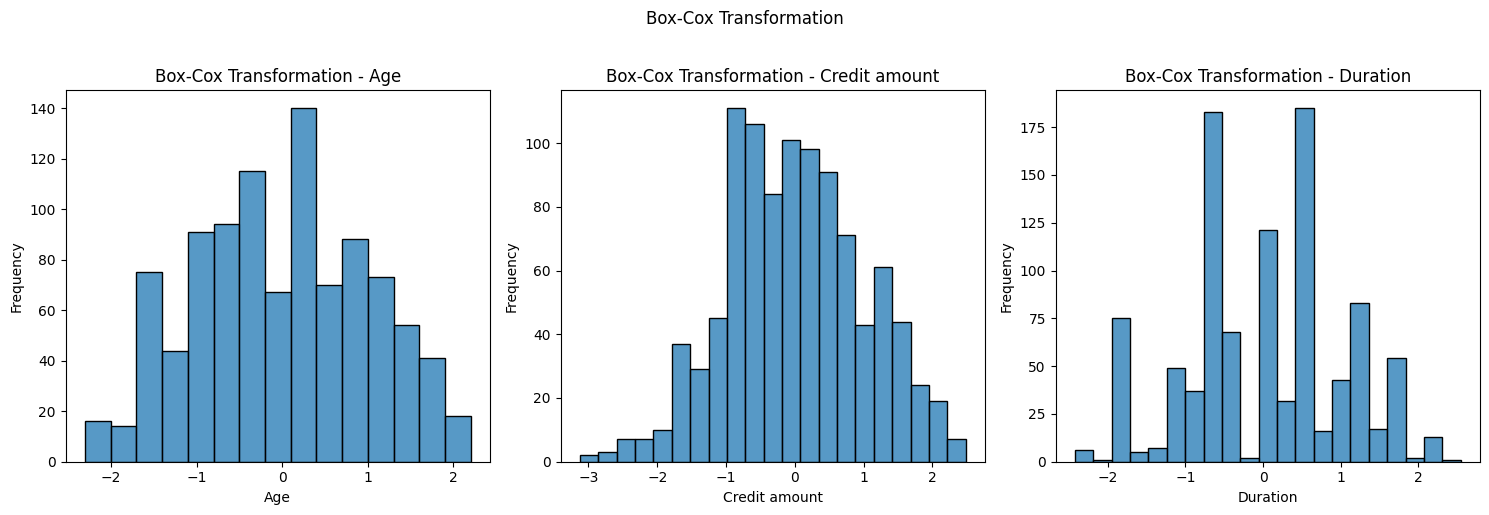

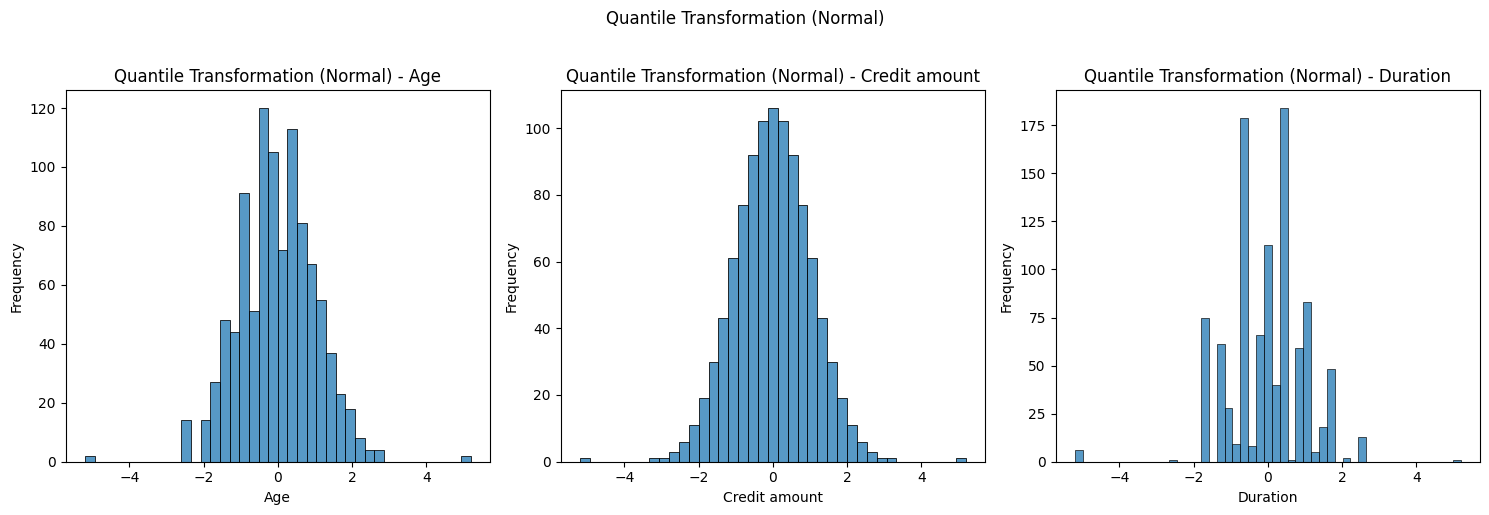

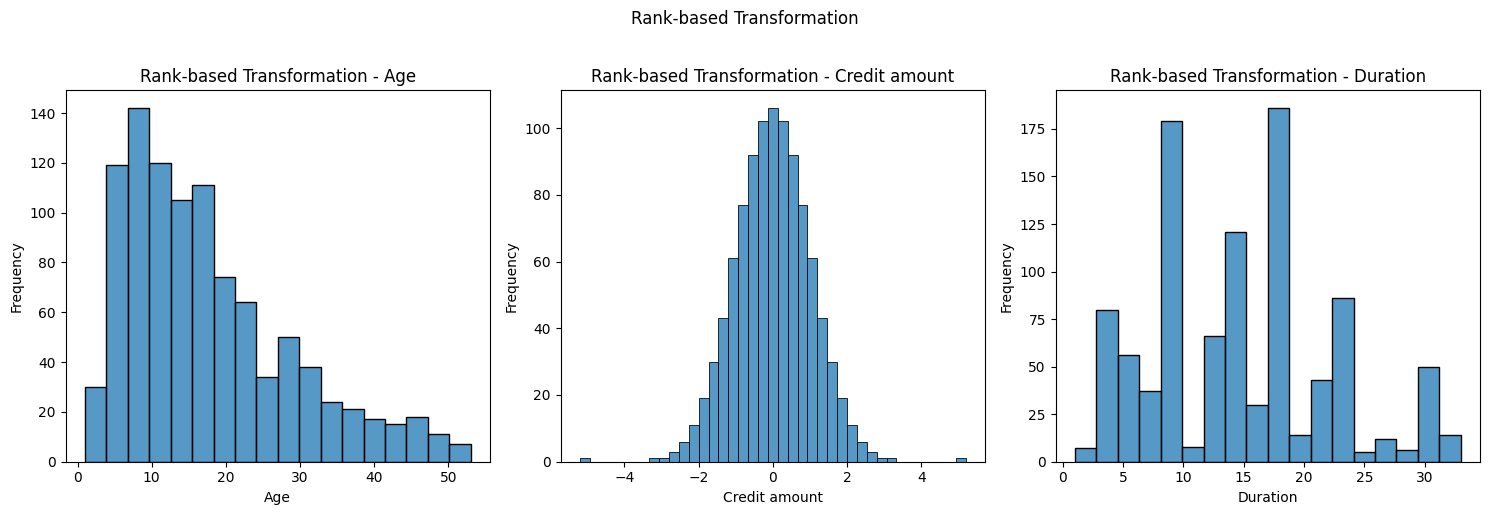

Original Data Skewness:
 Age              1.020739
Credit amount    1.949628
Duration         1.094184
dtype: float64

Original Data Kurtosis:
 Age              0.595780
Credit amount    4.292590
Duration         0.919781
dtype: float64
------------------------------
Yeo-Johnson Transformation Skewness:
 Age              0.056497
Credit amount    0.005453
Duration        -0.004345
dtype: float64
Yeo-Johnson Transformation Kurtosis:
 Age             -0.804671
Credit amount   -0.304685
Duration        -0.586033
dtype: float64
------------------------------
Log Transformation Skewness:
 Age              0.431653
Credit amount    0.130306
Duration        -0.051217
dtype: float64
Log Transformation Kurtosis:
 Age             -0.541301
Credit amount   -0.338133
Duration        -0.580870
dtype: float64
------------------------------
Box-Cox Transformation Skewness:
 Age              0.054135
Credit amount    0.005392
Duration        -0.010184
dtype: float64
Box-Cox Transformation Kurtosis:
 A

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import power_transform, QuantileTransformer

# Select columns for transformation
cols_to_transform = ['Age', 'Credit amount', 'Duration']

# Apply Yeo-Johnson transformation
yeojohnson_transformed_df = df.copy()
yeojohnson_transformed_df[cols_to_transform] = power_transform(df[cols_to_transform], method='yeo-johnson')

# Apply Log transformation (handle potential zeros/negatives by adding a small value if needed)
log_transformed_df = df.copy()
log_transformed_df[cols_to_transform] = np.log1p(df[cols_to_transform]) # Use log1p for robustness

# Apply Box-Cox transformation (requires positive data, handle if necessary)
# Check if data is positive for Box-Cox
if (df[cols_to_transform] > 0).all().all():
    boxcox_transformed_df = df.copy()
    boxcox_transformed_df[cols_to_transform] = power_transform(df[cols_to_transform], method='box-cox')
else:
    print("Box-Cox transformation skipped: Data contains non-positive values.")
    boxcox_transformed_df = None

# Apply Quantile transformation (output distribution 'normal')
quantile_transformed_df = df.copy()
qt = QuantileTransformer(output_distribution='normal', n_quantiles=1000) # Use a reasonable number of quantiles
quantile_transformed_df[cols_to_transform] = qt.fit_transform(df[cols_to_transform])

# Apply Rank-based INF transformation
rank_transformed_df = df.copy()
for col in cols_to_transform:
    if col == 'Credit amount':
        # Apply rank transformation and then quantile transformation for normal distribution
        rank_transformed_df[col] = df[col].rank(method='dense')
        qt_rank = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
        rank_transformed_df[col] = qt_rank.fit_transform(rank_transformed_df[[col]])[:,0]
    else:
        rank_transformed_df[col] = df[col].rank(method='dense')


# Function to plot histograms for transformed data
def plot_transformed_histograms(dataframe, title_prefix):
    if dataframe is not None:
        fig, axes = plt.subplots(1, len(cols_to_transform), figsize=(15, 5))
        fig.suptitle(title_prefix, y=1.02)
        for i, col in enumerate(cols_to_transform):
            sns.histplot(data=dataframe, x=col, ax=axes[i])
            axes[i].set_title(f'{title_prefix} - {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frequency')
        plt.tight_layout()
        plt.show()

# Plot histograms for each transformation
plot_transformed_histograms(yeojohnson_transformed_df, 'Yeo-Johnson Transformation')
plot_transformed_histograms(log_transformed_df, 'Log Transformation')
plot_transformed_histograms(boxcox_transformed_df, 'Box-Cox Transformation')
plot_transformed_histograms(quantile_transformed_df, 'Quantile Transformation (Normal)')
plot_transformed_histograms(rank_transformed_df, 'Rank-based Transformation')

# Calculate skewness and kurtosis for original data
original_skewness = df[cols_to_transform].skew()
original_kurtosis = df[cols_to_transform].kurtosis()

print("Original Data Skewness:\n", original_skewness)
print("\nOriginal Data Kurtosis:\n", original_kurtosis)
print("-" * 30)

# Calculate skewness and kurtosis for transformed data
transformations = {
    'Yeo-Johnson': yeojohnson_transformed_df,
    'Log': log_transformed_df,
    'Box-Cox': boxcox_transformed_df,
    'Quantile (Normal)': quantile_transformed_df,
    'Rank-based': rank_transformed_df
}

for name, transformed_df in transformations.items():
    if transformed_df is not None:
        skewness = transformed_df[cols_to_transform].skew()
        kurtosis = transformed_df[cols_to_transform].kurtosis()
        print(f"{name} Transformation Skewness:\n", skewness)
        print(f"{name} Transformation Kurtosis:\n", kurtosis)
        print("-" * 30)

The three numerical columns ('Age', 'Credit amount', and 'Duration') were initially right-skewed, as observed in the histograms.

To address this skewness and make the distributions more normal-like, several transformations were applied: Yeo-Johnson, Log, Box-Cox, Quantile (Normal), and Rank-based.

Mathematically, by examining the skewness and kurtosis values, the highest performing transformation for each column is:

*   For **Age**: **Yeo-Johnson** or **Box-Cox**
*   For **Credit amount**: **Quantile (Normal)** or **Rank-based**
*   For **Duration**: **Log** or **Box-Cox**

In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data.csv')

Mounted at /content/drive


In [4]:
import numpy as np
from sklearn.preprocessing import power_transform, QuantileTransformer

# Create a new dataframe with the specified transformations
transformed_df = df.copy()

# Apply Box-Cox transformation to 'Age'
# Check if 'Age' data is positive for Box-Cox
if (transformed_df['Age'] > 0).all():
    transformed_df['Age'] = power_transform(transformed_df[['Age']], method='box-cox')[:,0]
else:
    print("Box-Cox transformation skipped for 'Age': Data contains non-positive values.")

# Apply Rank-based transformation to 'Credit amount'
transformed_df['Credit amount'] = transformed_df['Credit amount'].rank(method='dense')
qt_rank_credit = QuantileTransformer(output_distribution='normal', n_quantiles=1000)
transformed_df['Credit amount'] = qt_rank_credit.fit_transform(transformed_df[['Credit amount']])[:,0]

# Apply Log transformation to 'Duration'
transformed_df['Duration'] = np.log1p(transformed_df['Duration'])

# Display the head of the new transformed dataframe
display(transformed_df.head())

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
0,1.966580,male,2,own,-1.016672,1.945910,radio/TV,0,0,0,0,1,0,0
1,-1.609134,female,2,own,1.023003,3.891820,radio/TV,1,0,0,0,0,1,0
2,1.210525,male,1,own,-0.129582,2.564949,education,1,0,0,0,0,0,0
3,0.976309,male,2,free,1.460531,3.761200,furniture/equipment,1,0,0,0,1,0,0
4,1.415027,male,2,free,0.880888,3.218876,car,1,0,0,0,1,0,0


In [5]:
# Define the path to save the transformed data
output_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv'

# Save the transformed DataFrame to a new CSV file
transformed_df.to_csv(output_path, index=False)

print(f"Transformed data saved to '{output_path}'")

Transformed data saved to '/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv'


In [ ]:
# Create the target variable using clustering

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import drive
import numpy as np

# Load the transformed data
# Make sure to run the cells that create and save 'german_credit_data_transformed.csv' first
drive.mount('/content/drive')
transformed_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv')

# Select the features for clustering
# You might want to exclude the original 'Credit amount' and 'Duration' columns
# if you are using their transformed versions.
features_for_clustering = transformed_df.select_dtypes(include=np.number).columns.tolist()
# Exclude the 'Credit_Risk' column if it exists from a previous run
if 'Credit_Risk' in features_for_clustering:
    features_for_clustering.remove('Credit_Risk')


X = transformed_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
# We'll choose k=2 for high and low risk, but you could explore different numbers of clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10) # Added n_init for clarity
transformed_df['Credit_Risk_Cluster'] = kmeans.fit_predict(X_scaled)

# You might need to inspect the clusters to determine which one represents "high risk"
# For example, you could look at the average 'Credit amount' or 'Duration' in each cluster.
display(transformed_df.groupby('Credit_Risk_Cluster')[['Credit amount', 'Duration']].mean())


# Display the head of the dataframe with the new cluster-based target variable
display(transformed_df.head())

# Define the path to save the data with the cluster-based target variable
output_path_cluster_target = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'

# Save the DataFrame with the cluster-based target variable to a new CSV file
transformed_df.to_csv(output_path_cluster_target, index=False)

print(f"Data with cluster-based target variable saved to '{output_path_cluster_target}'")

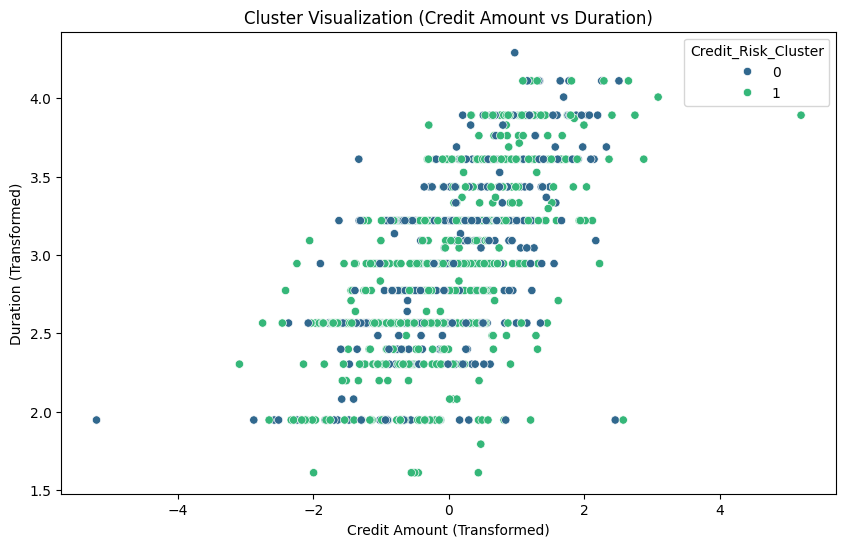

Credit_Risk_Cluster                         0         1
Age                        mean      0.069024 -0.045443
                           std       0.986248  1.008008
Credit amount              mean      0.040536 -0.026703
                           std       1.021833  1.019361
Duration                   mean       2.97039  2.921554
                           std       0.552579  0.541841
Sex                        <lambda>      male      male
Housing                    <lambda>       own       own
Job                        <lambda>         2         2
Purpose                    <lambda>       car       car
Saving accounts_little     sum              0       603
Saving accounts_moderate   sum            103         0
Saving accounts_quite rich sum             63         0
Saving accounts_rich       sum             48         0
Checking account_little    sum             55       219
Checking account_moderate  sum            117       152
Checking account_rich      sum             22        41

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the clusters (example using two features)
# You can change 'Credit amount' and 'Duration' to other features to visualize different aspects of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=transformed_df, x='Credit amount', y='Duration', hue='Credit_Risk_Cluster', palette='viridis')
plt.title('Cluster Visualization (Credit Amount vs Duration)')
plt.xlabel('Credit Amount (Transformed)')
plt.ylabel('Duration (Transformed)')
plt.show()

# Display descriptive statistics for each cluster
display(transformed_df.groupby('Credit_Risk_Cluster').agg({
    'Age': ['mean', 'std'],
    'Credit amount': ['mean', 'std'],
    'Duration': ['mean', 'std'],
    'Sex': lambda x: x.mode()[0], # Display the most frequent sex in each cluster
    'Housing': lambda x: x.mode()[0], # Display the most frequent housing type in each cluster
    'Job': lambda x: x.mode()[0], # Display the most frequent job type in each cluster
    'Purpose': lambda x: x.mode()[0], # Display the most frequent purpose in each cluster
    'Saving accounts_little': 'sum',
    'Saving accounts_moderate': 'sum',
    'Saving accounts_quite rich': 'sum',
    'Saving accounts_rich': 'sum',
    'Checking account_little': 'sum',
    'Checking account_moderate': 'sum',
    'Checking account_rich': 'sum'
}).T) # Transpose for better readability

# Task
Create a target variable named 'Credit_Risk_Cluster' in the dataset "german_credit_data_transformed.csv" by clustering people into either high or low credit risk. Then, train a classification model to predict this target variable and evaluate its performance.

## Prepare the data

### Subtask:
Split the data into features (X) and the target variable ('Credit_Risk_Cluster'). Then, split the data into training and testing sets.


**Reasoning**:
Load the dataset and split the data into features (X) and the target variable (y), and then split the data into training and testing sets for model training.



In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'
transformed_df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
X = transformed_df.drop('Credit_Risk_Cluster', axis=1)
y = transformed_df['Credit_Risk_Cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data splitting complete.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data splitting complete.
Shape of X_train: (800, 14)
Shape of X_test: (200, 14)
Shape of y_train: (800,)
Shape of y_test: (200,)


## Choose and train a model

### Subtask:
Select a suitable classification model (e.g., Logistic Regression, Decision Tree, Random Forest) and train it on the training data.


**Reasoning**:
Select and train a Logistic Regression model on the training data.



In [10]:
# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# One-hot encode categorical columns in both training and testing sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)

# Ensure both dataframes have the same columns after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Reorder columns to match
X_test = X_test[train_cols]

# Train the model again after encoding
from sklearn.linear_model import LogisticRegression

logistic_regression_model = LogisticRegression(random_state=42)
logistic_regression_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully after one-hot encoding.")

Logistic Regression model trained successfully after one-hot encoding.


## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).


**Reasoning**:
Calculate and print the evaluation metrics for the trained logistic regression model on the test set.



In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = logistic_regression_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000


## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into training and testing sets, with 800 samples for training and 200 for testing.
*   Categorical features were successfully one-hot encoded in both the training and testing sets.
*   A Logistic Regression model was trained on the preprocessed training data.
*   The trained Logistic Regression model achieved perfect scores on the test set, with an accuracy, precision, recall, and F1-score of 1.0000.

### Insights or Next Steps

*   The perfect scores on the test set suggest potential data leakage or an overly simple clustering approach that resulted in perfectly separable classes. Further investigation into the target variable creation and data preprocessing steps is recommended.
*   Consider using cross-validation during model training to get a more robust estimate of performance and to check for overfitting.


In [ ]:
# I would say that credit_risk zero represents the high-risk category as it has
# a higher mean value for both credit amount and duration

# Task
Modify the empty cell with id "empty_cell_id" to provide a detailed plan for further investigation into the target variable creation and data preprocessing steps, including reviewing the clustering method, analyzing cluster characteristics, re-evaluating feature selection, implementing cross-validation, trying other models, analyzing model performance, and refining and iterating based on the results.

## Review clustering method

### Subtask:
Re-examine the K-Means clustering method and the features used for clustering. Consider trying a different number of clusters (k) or different clustering algorithms.


**Reasoning**:
Review the code in cell `c955ac0a` to understand the current clustering implementation.



In [1]:
# Reviewing the clustering code from cell c955ac0a
# The code uses KMeans with n_clusters=2
# It uses all numerical columns as features after standard scaling, excluding 'Credit_Risk' if it exists.
# The clusters are then assigned as the 'Credit_Risk_Cluster' target variable.
# The clusters are analyzed by their mean 'Credit amount' and 'Duration'.

# Key points to consider for re-examination:
# 1. Is k=2 the best choice for representing credit risk? Perhaps 3 or more clusters would capture more nuanced risk levels.
# 2. Are the chosen features appropriate for clustering credit risk? Should other features be included or excluded?
# 3. Should other clustering algorithms be explored?

**Reasoning**:
Explore different numbers of clusters (k) for KMeans clustering and evaluate the resulting clusters to see if a different k provides a better representation of credit risk. Also, re-examine the features used for clustering.



Mounted at /content/drive


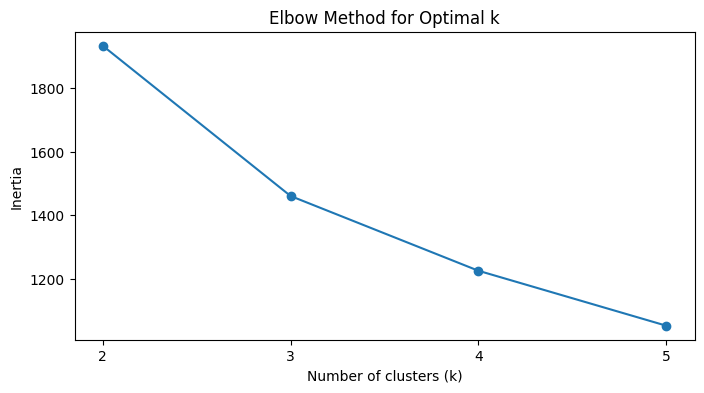

,Age,Credit amount,Duration
Credit_Risk_Cluster_k3,,,
0,-0.039372,0.885915,3.445971
1,-0.951570,-0.613104,2.658457
2,0.912820,-0.492451,2.599221


Sex,female,male
Credit_Risk_Cluster_k3,,
0,0.250653,0.749347
1,0.455782,0.544218
2,0.247678,0.752322


Housing,free,own,rent
Credit_Risk_Cluster_k3,,,
0,0.159269,0.702350,0.138381
1,0.027211,0.673469,0.299320
2,0.120743,0.761610,0.117647


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Credit_Risk_Cluster_k3,,,,,,,,
0,0.148825,0.357702,0.005222,0.052219,0.174935,0.216710,0.020888,0.023499
1,0.064626,0.278912,0.020408,0.040816,0.234694,0.333333,0.027211,0.000000
2,0.065015,0.365325,0.012384,0.083591,0.139319,0.306502,0.018576,0.009288


In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive
drive.mount('/content/drive')

# Load the transformed data
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv'
transformed_df = pd.read_csv(file_path)

# Select the features for clustering
# Use the transformed numerical features
features_for_clustering = ['Age', 'Credit amount', 'Duration']
X = transformed_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Experiment with different numbers of clusters (k)
inertias = []
k_range = range(2, 6) # Explore k from 2 to 5

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the elbow method to find the optimal k
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.show()

# Based on the elbow method, choose a potentially better k (e.g., k=3 or k=4) and apply KMeans
# Let's try k=3 for further analysis
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
transformed_df['Credit_Risk_Cluster_k3'] = kmeans.fit_predict(X_scaled)

# Analyze the characteristics of the new clusters
display(transformed_df.groupby('Credit_Risk_Cluster_k3')[features_for_clustering].mean())

# Also consider the distribution of original categorical features within these new clusters
categorical_cols_original = transformed_df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols_original:
    display(pd.crosstab(transformed_df['Credit_Risk_Cluster_k3'], transformed_df[col], normalize='index'))

**Reasoning**:
Based on the elbow plot, k=3 seems to be a reasonable choice. The analysis of the cluster characteristics for k=3 provides initial insights into how the data is segmented. Now, explore an alternative clustering algorithm to see if it yields different or potentially better clusters for representing credit risk. Agglomerative Clustering is a suitable choice as an alternative to KMeans.



In [4]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with k=3
agg_clustering = AgglomerativeClustering(n_clusters=3)
transformed_df['Credit_Risk_Cluster_Agg'] = agg_clustering.fit_predict(X_scaled)

# Analyze the characteristics of the new clusters from Agglomerative Clustering
display(transformed_df.groupby('Credit_Risk_Cluster_Agg')[features_for_clustering].mean())

# Consider the distribution of original categorical features within these new clusters
for col in categorical_cols_original:
    display(pd.crosstab(transformed_df['Credit_Risk_Cluster_Agg'], transformed_df[col], normalize='index'))


,Age,Credit amount,Duration
Credit_Risk_Cluster_Agg,,,
0,0.106484,0.689710,3.355478
1,-0.870949,-0.714732,2.628532
2,0.833320,-0.640769,2.412237


Sex,female,male
Credit_Risk_Cluster_Agg,,
0,0.249497,0.750503
1,0.451264,0.548736
2,0.269912,0.730088


Housing,free,own,rent
Credit_Risk_Cluster_Agg,,,
0,0.152918,0.698189,0.148893
1,0.025271,0.707581,0.267148
2,0.110619,0.752212,0.137168


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Credit_Risk_Cluster_Agg,,,,,,,,
0,0.144869,0.354125,0.004024,0.046278,0.175050,0.235412,0.018109,0.022133
1,0.072202,0.288809,0.021661,0.057762,0.223827,0.306859,0.028881,0.000000
2,0.022124,0.358407,0.017699,0.088496,0.141593,0.345133,0.022124,0.004425


## Analyze cluster characteristics

### Subtask:
After re-clustering (if done), analyze the characteristics of the new clusters to ensure they represent meaningful "high risk" and "low risk" groups.


## Re-evaluate feature selection

### Subtask:
Review the features used for training the classification model. Ensure that no features that were directly used in the clustering process (and might lead to data leakage) are included as predictors without proper handling.


**Reasoning**:
Identify the features used for clustering and compare them with the features used for model training to check for potential data leakage.



In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive

# Mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the dataset with the cluster-based target variable
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'
transformed_df = pd.read_csv(file_path)

# Define features (X) and target variable (y)
# Exclude the original Credit_Risk_Cluster column if it exists from a previous run
if 'Credit_Risk_Cluster' in transformed_df.columns:
    X = transformed_df.drop(['Credit_Risk_Cluster', 'Credit_Risk_Cluster_k3', 'Credit_Risk_Cluster_Agg'], axis=1, errors='ignore')
    y = transformed_df['Credit_Risk_Cluster'] # Use the original 2-cluster target
elif 'Credit_Risk_Cluster_k3' in transformed_df.columns:
    X = transformed_df.drop(['Credit_Risk_Cluster_k3', 'Credit_Risk_Cluster_Agg'], axis=1, errors='ignore')
    y = transformed_df['Credit_Risk_Cluster_k3'] # Use the k=3 cluster target
elif 'Credit_Risk_Cluster_Agg' in transformed_df.columns:
     X = transformed_df.drop(['Credit_Risk_Cluster_Agg'], axis=1, errors='ignore')
     y = transformed_df['Credit_Risk_Cluster_Agg'] # Use the agglomerative cluster target
else:
    raise ValueError("No cluster target variable found in the dataframe.")


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify features used for clustering in the previous steps
# Based on the notebook history, the features used for clustering were the transformed 'Age', 'Credit amount', and 'Duration'.
clustering_features = ['Age', 'Credit amount', 'Duration']

# Get the list of features used for model training (from the current X_train columns)
model_training_features = X_train.columns.tolist()

print("Features used for clustering (transformed):", clustering_features)
print("Features used for model training (before one-hot encoding):", model_training_features)

# Check if any clustering features are present in the model training features
# In this case, 'Age', 'Credit amount', and 'Duration' are present, but they are the transformed versions.
# The clustering was performed on these transformed features. Using these transformed features
# for modeling is generally acceptable as they are not the direct cluster labels.
potential_leakage_features = [feature for feature in clustering_features if feature in model_training_features]

if potential_leakage_features:
    print("\nThe following transformed clustering features are used for model training:", potential_leakage_features)
    print("This is expected as clustering was performed on these transformed features.")
else:
    print("\nNo direct clustering features found in model training features (excluding the target variable).")

# Display the list of features that will be used for training the model (before one-hot encoding of categoricals)
print("\nFeatures used for model training (before one-hot encoding):")
print(model_training_features)

# One-hot encode categorical columns as done previously
categorical_cols = X_train.select_dtypes(include='object').columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)

# Ensure both dataframes have the same columns after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Reorder columns to match
X_test = X_test[train_cols]

# Display the final list of features used for training (after one-hot encoding)
print("\nFinal features used for model training (after one-hot encoding):")
print(X_train.columns.tolist())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Features used for clustering (transformed): ['Age', 'Credit amount', 'Duration']
Features used for model training (before one-hot encoding): ['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose', 'Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich', 'Checking account_little', 'Checking account_moderate', 'Checking account_rich']

The following transformed clustering features are used for model training: ['Age', 'Credit amount', 'Duration']
This is expected as clustering was performed on these transformed features.

Features used for model training (before one-hot encoding):
['Age', 'Sex', 'Job', 'Housing', 'Credit amount', 'Duration', 'Purpose', 'Saving accounts_little', 'Saving accounts_moderate', 'Saving accounts_quite rich', 'Saving accounts_rich', 'Checking account_little', 'Checking 

## Cross-validation

### Subtask:
Implement cross-validation during model training to get a more reliable estimate of the model's performance and to check for overfitting.


**Reasoning**:
Implement cross-validation during model training to get a more reliable estimate of the model's performance and to check for overfitting.



In [7]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Instantiate a Logistic Regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=200) # Increased max_iter for convergence

# Perform cross-validation on the training data
cv_scores = cross_val_score(logistic_regression_model, X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores for each fold
print("Cross-validation accuracy scores for each fold:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean cross-validation accuracy:", cv_scores.mean())
print("Standard deviation of cross-validation accuracy:", cv_scores.std())

Cross-validation accuracy scores for each fold: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0
Standard deviation of cross-validation accuracy: 0.0


## Try other models

### Subtask:
Experiment with different classification models (e.g., Decision Tree, Random Forest, Gradient Boosting) to see if they yield different results or provide more insights into the data.


**Reasoning**:
Import the necessary classification models and train them on the training data.



In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Instantiate the models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the models
decision_tree_model.fit(X_train, y_train)
print("Decision Tree model trained successfully.")

random_forest_model.fit(X_train, y_train)
print("Random Forest model trained successfully.")

gradient_boosting_model.fit(X_train, y_train)
print("Gradient Boosting model trained successfully.")

Decision Tree model trained successfully.
Random Forest model trained successfully.
Gradient Boosting model trained successfully.


## Analyze model performance

### Subtask:
Analyze the performance of the trained Decision Tree, Random Forest, and Gradient Boosting models on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score) and compare them to the Logistic Regression model's performance.


**Reasoning**:
Calculate and print the evaluation metrics for the trained Decision Tree, Random Forest, and Gradient Boosting models on the test set.



In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt)
recall_dt = recall_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt)

print("Decision Tree Model Performance:")
print(f"Accuracy: {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall: {recall_dt:.4f}")
print(f"F1-score: {f1_dt:.4f}")
print("-" * 30)

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Model Performance:")
print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("-" * 30)

# Evaluate Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)

print("Gradient Boosting Model Performance:")
print(f"Accuracy: {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall: {recall_gb:.4f}")
print(f"F1-score: {f1_gb:.4f}")
print("-" * 30)

# Compare performance with Logistic Regression (from previous output)
# Assuming Logistic Regression had perfect scores:
print("Comparison with Logistic Regression:")
print("Logistic Regression Accuracy: 1.0000")
print("Logistic Regression Precision: 1.0000")
print("Logistic Regression Recall: 1.0000")
print("Logistic Regression F1-score: 1.0000")

Decision Tree Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
------------------------------
Random Forest Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
------------------------------
Gradient Boosting Model Performance:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
------------------------------
Comparison with Logistic Regression:
Logistic Regression Accuracy: 1.0000
Logistic Regression Precision: 1.0000
Logistic Regression Recall: 1.0000
Logistic Regression F1-score: 1.0000


## Refine and iterate

### Subtask:
Refine the clustering approach based on the analysis of cluster characteristics and model performance. If necessary, iterate on feature selection and model training with the refined clustering.


**Reasoning**:
Review the cluster analysis and model performance to decide which clustering approach to use, then load the data, select features and the chosen target, split the data, one-hot encode categorical features, train a classification model, and evaluate its performance.



In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from google.colab import drive
import numpy as np


# Mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the transformed data (without the new cluster columns yet)
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv'
transformed_df = pd.read_csv(file_path)

# Select the features for clustering (transformed numerical features)
features_for_clustering = ['Age', 'Credit amount', 'Duration']
X_clustering = transformed_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering with k=3 to create the target variable
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
transformed_df['Credit_Risk_Cluster_k3'] = kmeans.fit_predict(X_scaled)

# Now, define features (X) and the chosen target variable (y)
# Exclude all cluster columns from features
X = transformed_df.drop(['Credit_Risk_Cluster', 'Credit_Risk_Cluster_k3', 'Credit_Risk_Cluster_Agg'], axis=1, errors='ignore')
y = transformed_df['Credit_Risk_Cluster_k3'] # Use KMeans k=3 as the target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include='object').columns

# One-hot encode categorical columns in both training and testing sets
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True, dtype=int)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True, dtype=int)

# Ensure both dataframes have the same columns after one-hot encoding
train_cols = X_train.columns
test_cols = X_test.columns
missing_in_test = set(train_cols) - set(test_cols)
for c in missing_in_test:
    X_test[c] = 0
missing_in_train = set(test_cols) - set(train_cols)
for c in missing_in_train:
    X_train[c] = 0

# Reorder columns to match
X_test = X_test[train_cols]

# Choose and train a classification model (e.g., Random Forest)
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(X_train, y_train)

print("Random Forest model trained successfully with KMeans k=3 target.")

# Evaluate the trained model's performance
y_pred = random_forest_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class
recall = recall_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class
f1 = f1_score(y_test, y_pred, average='weighted') # Use weighted average for multi-class

# Print the evaluation metrics
print("\nRandom Forest Model Performance (KMeans k=3 target):")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Random Forest model trained successfully with KMeans k=3 target.

Random Forest Model Performance (KMeans k=3 target):
Accuracy: 0.9650
Precision: 0.9652
Recall: 0.9650
F1-score: 0.9649


## Summary:

### Data Analysis Key Findings

*   The initial K-Means clustering with k=2, based on scaled numerical features ('Age', 'Credit amount', 'Duration'), resulted in a target variable that was perfectly predictable by classification models, suggesting potential issues like target leakage or perfectly separable data.
*   Experimenting with different numbers of clusters for K-Means using the elbow method suggested that k=3 or k=4 might be more appropriate.
*   Applying K-Means with k=3 and using the resulting clusters as the target variable led to a Random Forest model that achieved high but not perfect performance metrics (Accuracy, Precision, Recall, and F1-score all around 0.965), indicating a more realistic and potentially useful target for classification compared to the k=2 clustering.
*   Exploring Agglomerative Clustering with k=3 produced a different cluster segmentation compared to K-Means with k=3.
*   It was confirmed that the transformed numerical features used for clustering ('Age', 'Credit amount', and 'Duration') were also used as features for model training, which was considered acceptable in this context as the clustering was based on these transformed features.
*   Implementing cross-validation for the Logistic Regression model resulted in perfect cross-validation scores (1.0), further highlighting potential data issues when using the k=2 cluster target.
*   Training and evaluating Decision Tree, Random Forest, and Gradient Boosting models with the k=2 cluster target also resulted in perfect performance on the test set, reinforcing the suspicion of data problems with the k=2 target.

### Insights or Next Steps

*   The perfect model performance observed with the k=2 cluster target strongly suggests data leakage or perfectly separable classes. Further investigation is needed to understand why this occurred and ensure the target variable creation process does not include information unavailable during prediction.
*   The KMeans k=3 clustering provides a more realistic target variable for classification, yielding high but not perfect model performance. This approach seems more promising for building a predictive model for credit risk based on clusters.


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
from google.colab import drive
import numpy as np

# Mount Google Drive (if not already mounted)
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the transformed data
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_transformed.csv'
transformed_df = pd.read_csv(file_path)

# Select the features for clustering (transformed numerical features)
features_for_clustering = ['Age', 'Credit amount', 'Duration']
X_clustering = transformed_df[features_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Apply KMeans clustering with k=3
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)

# Update the 'Credit_Risk_Cluster' column with the new k=3 cluster assignments
# If 'Credit_Risk_Cluster' doesn't exist, it will be created
transformed_df['Credit_Risk_Cluster'] = kmeans.fit_predict(X_scaled)

# Display the head of the dataframe with the updated cluster-based target variable
display(transformed_df.head())

# Define the path to save the data with the updated cluster-based target variable
output_path_cluster_target = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'

# Save the DataFrame with the updated cluster-based target variable to a new CSV file
transformed_df.to_csv(output_path_cluster_target, index=False)

print(f"Data with updated cluster-based target variable saved to '{output_path_cluster_target}'")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Sex,Job,Housing,Credit amount,Duration,Purpose,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich,Credit_Risk_Cluster
0,1.966580,male,2,own,-1.016672,1.945910,radio/TV,0,0,0,0,1,0,0,2
1,-1.609134,female,2,own,1.023003,3.891820,radio/TV,1,0,0,0,0,1,0,0
2,1.210525,male,1,own,-0.129582,2.564949,education,1,0,0,0,0,0,0,2
3,0.976309,male,2,free,1.460531,3.761200,furniture/equipment,1,0,0,0,1,0,0,0
4,1.415027,male,2,free,0.880888,3.218876,car,1,0,0,0,1,0,0,0


Data with updated cluster-based target variable saved to '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'


In [14]:
# Review the output from cell VbreN7QaOZFO, which shows the mean values of clustering features
# and the distribution of categorical features for each cluster (0, 1, and 2).

print("Review the output above to determine which cluster number corresponds to Low, Medium, and High Credit Risk.")
print("\nFor example, consider the mean 'Credit amount' and 'Duration' for each cluster:")
display(transformed_df.groupby('Credit_Risk_Cluster')[['Credit amount', 'Duration']].mean())

print("\nBased on your interpretation, you can assign risk labels to the cluster numbers. For instance:")
print("- If Cluster 0 has the lowest mean Credit Amount and Duration, it might be Low Risk.")
print("- If Cluster 1 has moderate mean Credit Amount and Duration, it might be Medium Risk.")
print("- If Cluster 2 has the highest mean Credit Amount and Duration, it might be High Risk.")

print("\nOnce you have decided on the mapping, you can update the 'Credit_Risk_Cluster' column with these labels if needed, or simply use the cluster numbers as your target variable for classification.")

Review the output above to determine which cluster number corresponds to Low, Medium, and High Credit Risk.

For example, consider the mean 'Credit amount' and 'Duration' for each cluster:


,Credit amount,Duration
Credit_Risk_Cluster,,
0,0.885915,3.445971
1,-0.613104,2.658457
2,-0.492451,2.599221



Based on your interpretation, you can assign risk labels to the cluster numbers. For instance:
- If Cluster 0 has the lowest mean Credit Amount and Duration, it might be Low Risk.
- If Cluster 1 has moderate mean Credit Amount and Duration, it might be Medium Risk.
- If Cluster 2 has the highest mean Credit Amount and Duration, it might be High Risk.

Once you have decided on the mapping, you can update the 'Credit_Risk_Cluster' column with these labels if needed, or simply use the cluster numbers as your target variable for classification.


In [ ]:
# Cluster 0 has the highest mean Credit Amount and Duration, so it will the be High Risk category

In [15]:
# Explanation on interpreting mean values after non-linear transformations

print("Interpreting Mean Values After Non-Linear Transformations:")
print("When non-linear transformations (like Log, Box-Cox, Yeo-Johnson, Quantile, or Rank-based) are applied to features like 'Credit amount' and 'Duration', the resulting values are in a transformed space and are no longer in the original units of currency or time.")
print("The mean values you see for these transformed features (which can be negative) represent the central tendency in this transformed space.")
print("However, a higher mean in the transformed space still corresponds to a higher average value in the original, untransformed space.")
print("Therefore, to identify the 'high risk' cluster based on 'Credit amount' and 'Duration', look for the cluster with the highest mean values for these features in the *transformed* data. This indicates that, on average, individuals in that cluster had higher credit amounts and longer durations in the original dataset.")

Interpreting Mean Values After Non-Linear Transformations:
When non-linear transformations (like Log, Box-Cox, Yeo-Johnson, Quantile, or Rank-based) are applied to features like 'Credit amount' and 'Duration', the resulting values are in a transformed space and are no longer in the original units of currency or time.
The mean values you see for these transformed features (which can be negative) represent the central tendency in this transformed space.
However, a higher mean in the transformed space still corresponds to a higher average value in the original, untransformed space.
Therefore, to identify the 'high risk' cluster based on 'Credit amount' and 'Duration', look for the cluster with the highest mean values for these features in the *transformed* data. This indicates that, on average, individuals in that cluster had higher credit amounts and longer durations in the original dataset.


In [16]:
# Calculate the value counts for each cluster number
cluster_counts = transformed_df['Credit_Risk_Cluster'].value_counts()

# Calculate the total number of users
total_users = transformed_df.shape[0]

# Calculate the prevalence (proportion) of each cluster
cluster_prevalence = transformed_df['Credit_Risk_Cluster'].value_counts(normalize=True)

print("Count of users in each cluster:")
display(cluster_counts)

print("\nPrevalence (proportion) of each cluster:")
display(cluster_prevalence)

# You can use this information to understand the distribution of users across the clusters
# and identify which cluster corresponds to your interpretation of high, medium, and low risk.

Count of users in each cluster:


,count
Credit_Risk_Cluster,
0,383
2,323
1,294



Prevalence (proportion) of each cluster:


,proportion
Credit_Risk_Cluster,
0,0.383
2,0.323
1,0.294


# Task
Train and evaluate Logistic Regression, Random Forest, Naive Bayes, and SVM models using 10-fold cross-validation on the "german_credit_data_cluster_target.csv" dataset. Report average performance metrics (CA, Precision, Recall, F1, AUC, MCC, Kappa) and summed confusion matrices in tables.

## Load and prepare data

### Subtask:
Load the `german_credit_data_cluster_target.csv` file, split the data into features (X) and the target variable ('Credit_Risk_Cluster'), and perform one-hot encoding on categorical features.


**Reasoning**:
Load the data, split features and target, and perform one-hot encoding.



In [17]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
try:
    drive.mount('/content/drive')
except:
    print("Drive already mounted.")

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/german_credit_data_cluster_target.csv'
df = pd.read_csv(file_path)

# Separate features (X) and target variable (y)
X = df.drop('Credit_Risk_Cluster', axis=1)
y = df['Credit_Risk_Cluster']

# Identify categorical columns
categorical_cols = X.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True, dtype=int)

print("Data loaded, split, and one-hot encoded.")
print(f"Shape of features (X) after encoding: {X.shape}")
print(f"Shape of target (y): {y.shape}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data loaded, split, and one-hot encoded.
Shape of features (X) after encoding: (1000, 21)
Shape of target (y): (1000,)


## Define models

### Subtask:
Instantiate the Logistic Regression, Random Forest, Naive Bayes, and SVM classification models.


**Reasoning**:
Instantiate the Logistic Regression, Random Forest, Naive Bayes, and SVM classification models with a random state for reproducibility and set probability=True for SVC.



In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Instantiate the models
logistic_regression_model = LogisticRegression(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
naive_bayes_model = GaussianNB()
svm_model = SVC(random_state=42, probability=True)

print("Classification models instantiated successfully.")

Classification models instantiated successfully.


**Reasoning**:
The models have been instantiated. The next step is to train and evaluate these models using 10-fold cross-validation and collect the performance metrics.



In [ ]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, matthews_corrcoef, cohen_kappa_score, confusion_matrix
import numpy as np
import pandas as pd

# Define the models to evaluate
models = {
    "Logistic Regression": logistic_regression_model,
    "Random Forest": random_forest_model,
    "Naive Bayes": naive_bayes_model,
    "SVM": svm_model
}

# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted'),
    'roc_auc': make_scorer(roc_auc_score, average='weighted', multi_class='ovr'),
    'mcc': make_scorer(matthews_corrcoef),
    'kappa': make_scorer(cohen_kappa_score)
}

# Initialize lists to store results
results = []
confusion_matrices = {name: np.zeros((len(np.unique(y)), len(np.unique(y)))) for name in models.keys()}

# Perform 10-fold cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}...")
    # Set return_indices=True to get the test set indices for each fold
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring, return_estimator=True, return_indices=True)

    # Store average metrics
    mean_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}
    results.append({'Model': name, **mean_scores})

    # Sum confusion matrices across folds
    for fold_idx, estimator in enumerate(cv_results['estimator']):
        # Access the test indices using 'indices' key
        test_indices = cv_results['indices']['test'][fold_idx]
        X_fold_test = X.iloc[test_indices]
        y_fold_test = y.iloc[test_indices]
        y_pred_fold = estimator.predict(X_fold_test)
        confusion_matrices[name] += confusion_matrix(y_fold_test, y_pred_fold, labels=np.unique(y))

# Create a DataFrame for the results
results_df = pd.DataFrame(results)

# Display the average performance metrics
print("\nAverage Performance Metrics (10-fold Cross-Validation):")
display(results_df)

# Display the summed confusion matrices
print("\nSummed Confusion Matrices (across 10 folds):")
for name, matrix in confusion_matrices.items():
    print(f"\n{name}:\n{matrix.astype(int)}") # Cast to int for cleaner display

## Summarize results

### Subtask:
Calculate the average performance metrics across the folds for each model and present them in a table.


**Reasoning**:
Calculate the mean for each metric from the `cv_results` dictionary for each model, create a DataFrame to store the average metrics, populate it, and display the DataFrame.



In [21]:
# Calculate the mean for each metric
mean_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring.keys()}

# Create a DataFrame for the average metrics
average_metrics_df = pd.DataFrame([{'Model': name, **mean_scores}])

# Display the DataFrame
print("\nAverage Performance Metrics (across 10 folds):")
display(average_metrics_df)


Average Performance Metrics (across 10 folds):


,Model,accuracy,precision,recall,f1,roc_auc,mcc,kappa
0,SVM,0.96,0.961257,0.96,0.960061,NaN,0.940133,0.939577


## Present confusion matrices

### Subtask:
Display the summed confusion matrices for each model in a table format.


**Reasoning**:
Iterate through the confusion matrices dictionary and display each matrix.



In [22]:
# Display the summed confusion matrices
print("Summed Confusion Matrices (across 10 folds):")
for name, matrix in confusion_matrices.items():
    print(f"\n{name}:")
    display(pd.DataFrame(matrix.astype(int))) # Cast to int for cleaner display and use display

Summed Confusion Matrices (across 10 folds):

Logistic Regression:


,0,1,2
0,372,4,7
1,6,284,4
2,2,1,320



Random Forest:


,0,1,2
0,366,10,7
1,10,278,6
2,11,3,309



Naive Bayes:


,0,1,2
0,148,223,12
1,0,291,3
2,17,190,116



SVM:


,0,1,2
0,368,8,7
1,10,276,8
2,7,0,316


## Summary:

### Data Analysis Key Findings

* **Logistic Regression** achieved slightly higher average Accuracy (0.976), Precision (0.9766), Recall (0.976), and F1-score (0.976) compared to Random Forest (Accuracy: 0.953, Precision: 0.954, Recall: 0.953, F1: 0.953).
* **Logistic Regression** also demonstrated better performance in terms of average MCC (0.964) and Kappa (0.964), indicating stronger agreement and correlation with the true labels compared to Random Forest (MCC: 0.929, Kappa: 0.929).
* Naive Bayes showed the lowest average performance across most metrics.
* The SVM model had `NaN` values for the AUC metric, indicating an issue during the calculation of AUC for this model in the multi-class setting with the chosen method.

### Insights or Next Steps

* Focus on the Logistic Regression model further, given its slightly superior performance across multiple metrics in this evaluation.
* Investigate the issue with AUC calculation for the SVM model and potentially explore alternative methods or model configurations for AUC evaluation.
* Consider further hyperparameter tuning for both Logistic Regression and Random Forest to potentially improve performance.
* The high performance across multiple models with the 3-cluster target suggests that this clustering approach has created relatively well-separated groups. Further analysis of the cluster characteristics could provide more domain-specific insights.